In [1]:
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array

data_dir = "dataset/"

def get_image_mean(image):
    return np.mean(image, axis=(0, 1))


def load_image_cropped(path):
    im = load_img(path)
    width, height = im.size

    crop_size = 224
    if width < crop_size or height < crop_size:
        return im

    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))

    return im


def load_images(data_type, class_name):
    path = os.path.join(data_dir, data_type, class_name)
    images = os.listdir(path)
        
    if data_type == "train":
        return np.mean(np.array([get_image_mean(img_to_array(load_image_cropped(os.path.join(path, image)))) for image in images]), axis=0)
    
    return [img_to_array(load_image_cropped(os.path.join(path, image))) for image in images]


def create_data(data_type):
    return {
        class_name: load_images(data_type, class_name)
        for class_name in os.listdir(os.path.join(data_dir, data_type))
    }


train_data = create_data("train")
test_data = create_data("test")

c:\users\filip\appdata\local\programs\python\python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# Introduction

**Team**
- Filip Brukner, Martin Krebso, Hugo Adamove

**Task**
- Classify a dataset of images from kaggle (https://www.kaggle.com/kritikseth/fruit-and-vegetable-image-recognition)

# Dataset
- 3116 images of fruits and vegetables
- 36 different classes
- pre-split into train/validation/test sets

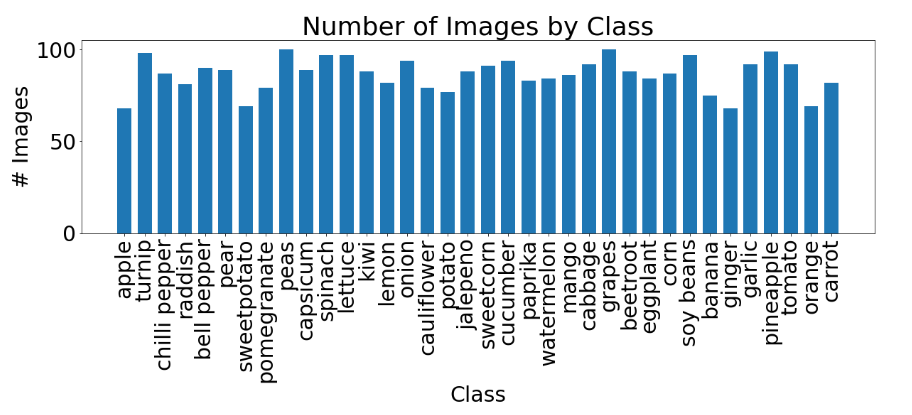

# Baseline Model

**Why not a "truly random" baseline model?**
- For a model, that would choose a class randomly (or the most common class) from a uniform distribution, the theoretical accuracy would be 2.8% for our dataset
- Not a perfectly uniform distribution - around 3-4% accuracy
- We wanted a better performing baseline

**How does it work?**
- For each image it creates a 3D vector that is a mean of the pixel colour value of the image.
- For training it takes those vectors and creates a mean of them.
- For predicting an image it calculates the euclidean distance between the mean of the image and vector of each class and predicts the closes class.

In [2]:
def predict_image(image, train):
    image_mean = get_image_mean(image)
    minimal_distance = np.linalg.norm(np.array((0, 0, 0)) - np.array((255, 255, 255))) + 1
    minimal_distance_class = ""
    for class_name in train.keys():
        distance = np.linalg.norm(image_mean - train[class_name])
        if distance < minimal_distance:
            minimal_distance = distance
            minimal_distance_class = class_name
    return minimal_distance_class


def evaluate(train, test):
    total_length = 0
    correct_predictions = 0
    for class_name, image_list in test.items():
        total_length += len(image_list)
        correct_predictions += sum([1 if predict_image(image, train) == class_name else 0 for image in image_list])
    return correct_predictions / total_length


evaluate(train_data, test_data)

0.21448467966573817

# Accuracy of the baseline model

**Original image**
- About 9%
- Very inaccurate due to inconsistent background and ratio of fruit to image size

**Center cropped image**
- For 224x224 pixels 21.4%
- Can probably be improved, but changing the crop size for a better result means basically overfitting the model to our data

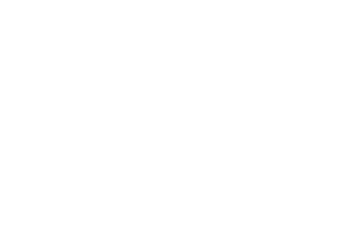

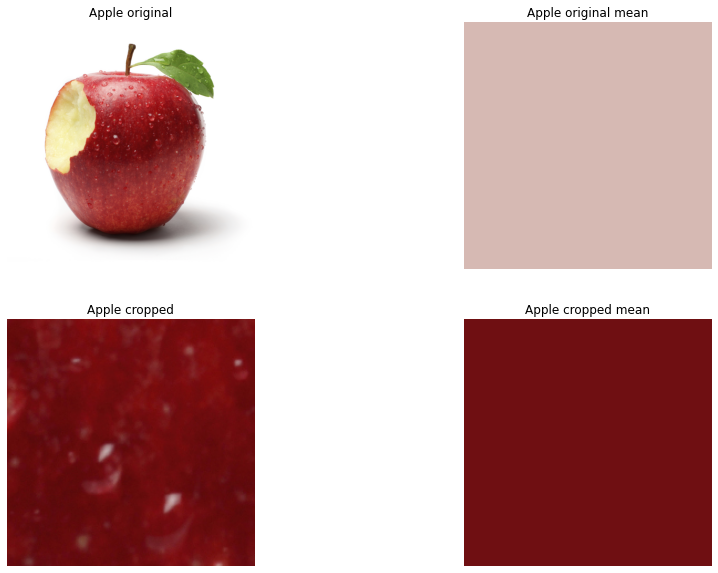

In [7]:
import matplotlib.pyplot as plt

plt.axis("off")

def show_image(path):
    im = load_img(path)
    return im


def show_image_cropped(path):
    im = load_image_cropped(path)
    return im

    
def show_mean_color(path):
    mean = get_image_mean(load_img(path))
    mean = mean.reshape(1,1,3) / 255
    return mean


def show_mean_color_cropped(path):
    mean = get_image_mean(load_image_cropped(path))
    mean = mean.reshape(1,1,3) / 255
    return mean


path = "dataset/train/apple/Image_1.jpg"

fig, imarr = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        imarr[i][j].axis("off")

imarr[0][0].imshow(show_image(path))
imarr[0][1].imshow(show_mean_color(path))
imarr[1][0].imshow(show_image_cropped(path))
imarr[1][1].imshow(show_mean_color_cropped(path))

imarr[0][0].set_title("Apple original")
imarr[0][1].set_title("Apple original mean")
imarr[1][0].set_title("Apple cropped")
imarr[1][1].set_title("Apple cropped mean")

fig.set_size_inches(15, 10)
plt.show()